# Creating a Neural Network

#### Imports :-

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

#### Dataset :-

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

4423680/4422102 [==============================] - 19s 4us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23] 

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

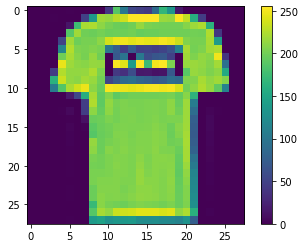

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing:-
<br>
<p>The last step before creating out model is to preprocess our data. Yhis simply means applying some prior transformations to our data before feeding it to the model. 
<p>Converging 0-255 to 0-1 so our model process values easily.

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model :-

    using 3 different layer keras sequential model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),      # input layer   1
    keras.layers.Dense(128, activation = 'relu'),    # hidden layer  2
    keras.layers.Dense(10, activation = 'softmax')  # Output layer  3
])

#### Compile the Model

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Training the Model

In [21]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3808 - accuracy: 0.8658
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3716 - accuracy: 0.8698
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8692


#### Evaluating the Model

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print ('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 71.9441 - accuracy: 0.7455
Test accuracy:  0.7455000281333923


#### Making Prediction

In [23]:
predictions = model.predict(test_images)

Coat


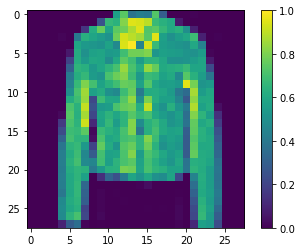

In [28]:
print(class_names[np.argmax(predictions[10])])
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()